# Logistic Regression

In [33]:
# Predicting the popularity of movie based on its budget

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Data Preprocessing

In [34]:
data = pd.read_csv("movies.csv")
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [35]:
# Select relevant columns
dataset = data[['budget', 'popularity']].copy()

In [36]:
# Drop rows with missing values
dataset.dropna(inplace=True)
dataset.head()

,budget,popularity
0,237000000,150.437577
1,300000000,139.082615
2,245000000,107.376788
3,250000000,112.312950
4,260000000,43.926995


In [37]:
# Create a binary target variable
median_popularity = dataset['popularity'].median()
dataset.loc[:,'popular'] = (dataset['popularity'] > median_popularity).astype(int)

In [38]:
# Verify the binary target variable
print(dataset['popular'].value_counts())

0    2402
1    2401
Name: popular, dtype: int64


In [39]:
# Split the data into training and testing sets
X = dataset[['budget']]
y = dataset['popular']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Reshape x_train and x_test to be 2D arrays
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

In [41]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [42]:
# Predict on the test set
y_pred = model.predict(x_test)

In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

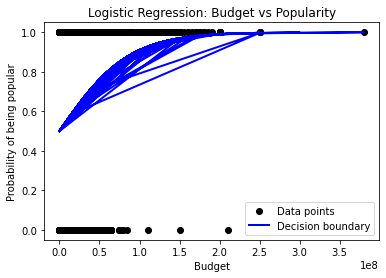

In [48]:
# Plot the decision boundary
plt.scatter(x_test, y_test, color='black', label='Data points')

# Plot decision boundary
x_values = X.values.reshape(-1, 1)
y_values = model.predict_proba(x_values)[:, 1]
plt.plot(x_values, y_values, color='blue', linewidth=2, label='Decision boundary')
plt.xlabel('Budget')
plt.ylabel('Probability of being popular')
plt.title('Logistic Regression: Budget vs Popularity')
plt.legend()
plt.show()

In [46]:
print("Accuracy:" ,accuracy)
print('Confusion Matrix:',conf_matrix)
print('Classification Report:',class_report)

Accuracy: 0.6805411030176899
Confusion Matrix: [[190 284]
 [ 23 464]]
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.40      0.55       474
           1       0.62      0.95      0.75       487

    accuracy                           0.68       961
   macro avg       0.76      0.68      0.65       961
weighted avg       0.75      0.68      0.65       961

